In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
import os
import numpy as np
from crowd_tracker_lidar3d.loader import load_data_to_dataframe
from crowd_tracker_lidar3d.plot_tools import plot_pointcloud3d, draw_point_cloud, show_projections
from crowd_tracker_lidar3d.preprocessing import rotate_pcl, df_apply_rot, return_ground_points
import matplotlib.pyplot as plt 

In [3]:
filename = '1m_1person-front_lidar-velodyne_points'

In [4]:
bag_dir = os.path.dirname(os.path.abspath(''))
bag_dir = os.path.join(bag_dir, "data")
data = load_data_to_dataframe(filename, bag_dir)

In [5]:
data.shape

(8708643, 6)

In [6]:
data.head()

,rosbagTimestamp,x,y,z,intensity,time
0,1585676343998862698,1.316860,0.683471,-0.397546,52.0,-0.099374
1,1585676343998862698,1.278028,0.663033,0.025131,47.0,-0.099372
2,1585676343998862698,1.489500,0.772413,-0.387366,47.0,-0.099370
3,1585676343998862698,2.275012,1.179255,0.134294,8.0,-0.099367
4,1585676343998862698,1.352574,0.701108,-0.296136,31.0,-0.099365


In [7]:
# investigate value ranges
x_max, x_min = np.max(data.x), np.min(data.x)
y_max, y_min = np.max(data.y), np.min(data.y)
z_max, z_min = np.max(data.z), np.min(data.z)
intensity_max, intensity_min = np.max(data.intensity), np.min(data.intensity)

print('x_max: {:.3f}, x_min: {:.3f}'.format(x_max, x_min))
print('y_max: {:.3f} y_min: {:.3f}'.format(y_min, y_max))
print('z_max: {:.3f}, z_min: {:.3f}'.format(z_max, z_min))
print('intensity_max: {:.3f}, intensity_min: {:.3f}'.format(intensity_max, intensity_min))
print('\nNumber of points: {}'.format(data.shape[0]))

x_max: 24.399, x_min: -5.037
y_max: -6.674 y_min: 4.692
z_max: 6.045, z_min: -0.526
intensity_max: 144.000, intensity_min: 0.000

Number of points: 8708643


In [39]:
# Number of unique timestamps
timesteps = data.rosbagTimestamp.unique()
len(timesteps)

431

In [40]:
# Analyze pointclouds from first and very last timestamp
start = data[data.rosbagTimestamp == timesteps[0]]
end = data[data.rosbagTimestamp == timesteps[-1]]

In [13]:
print(len(start))
print(len(end))

20302
20216


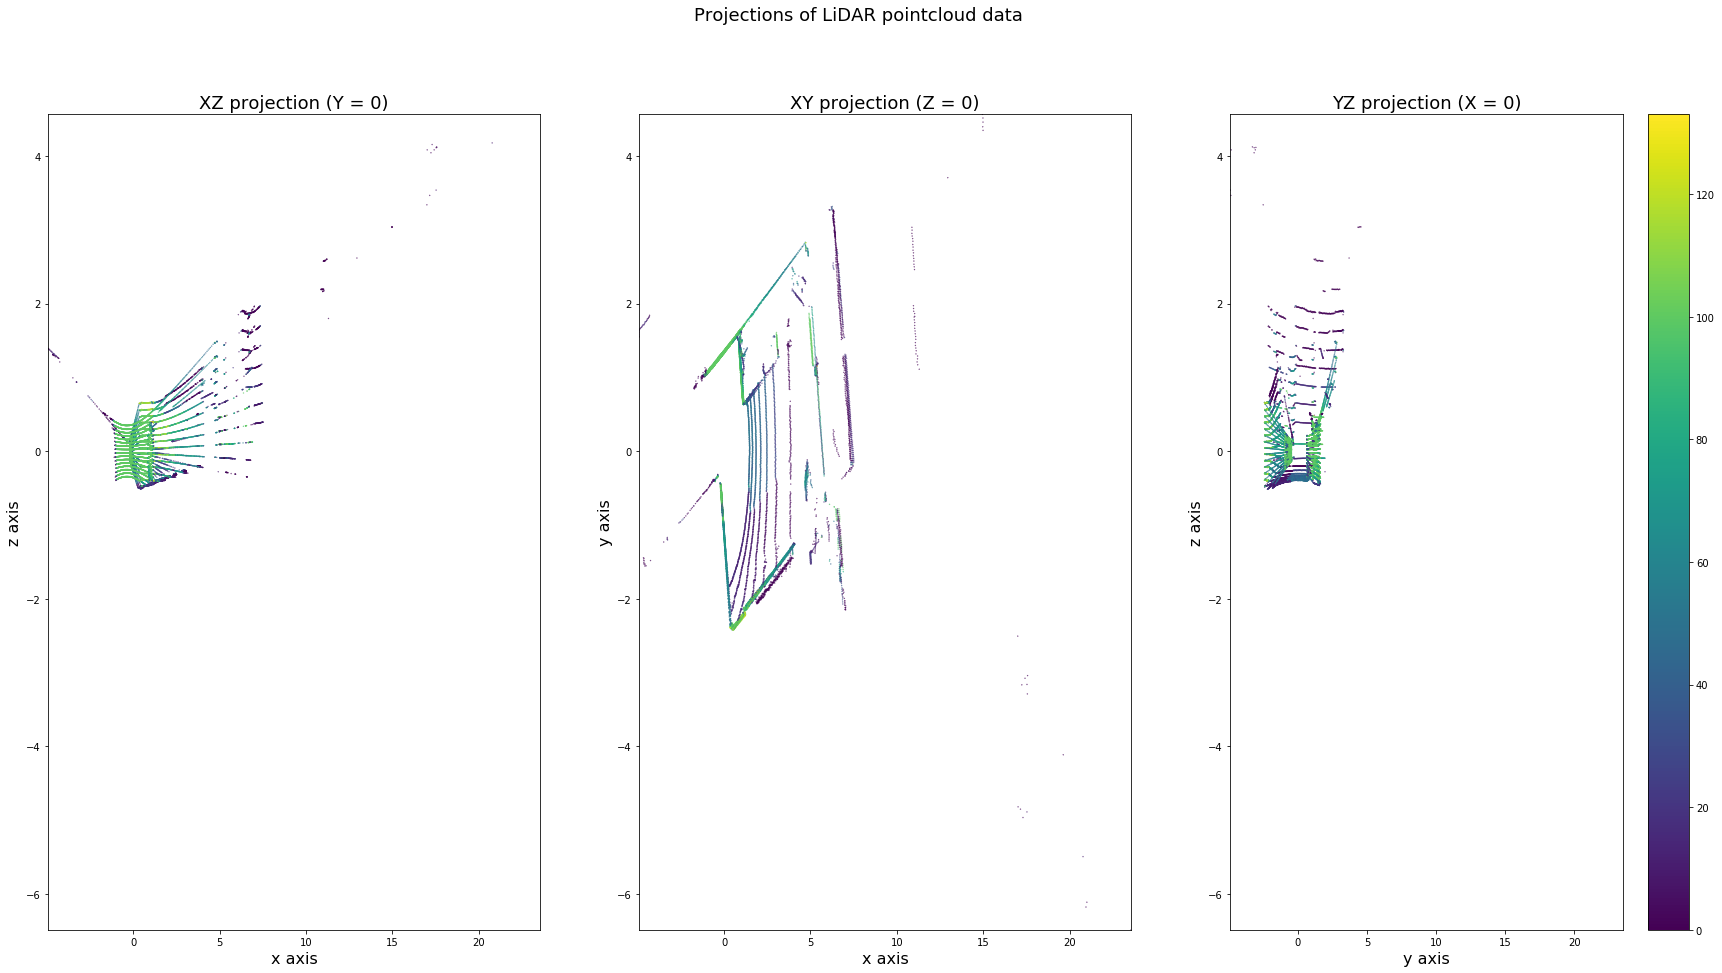

In [52]:
show_projections(start, ['x', 'y', 'z', 'intensity']) #savefig=True, filename='unfiltered_timestep0')

#### Filter out floor points

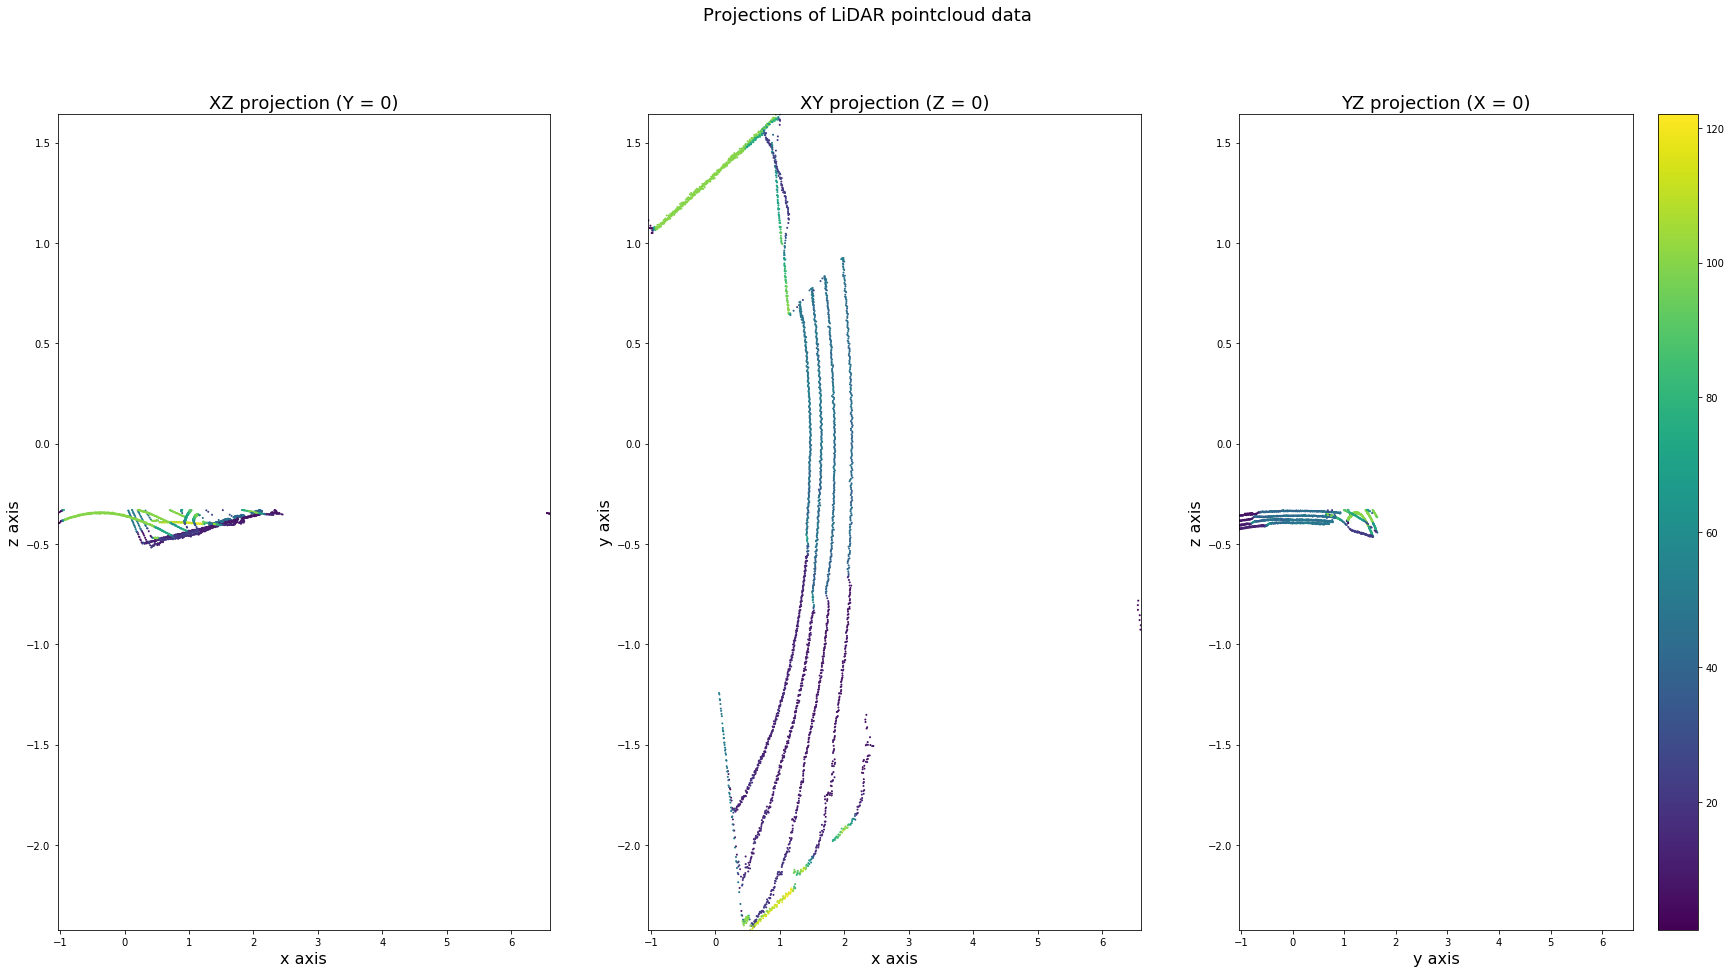

In [45]:
ground_values = data[data.z<= -0.33]
start_ground = ground_values[ground_values.rosbagTimestamp == timesteps[0]]
show_projections(start_ground, ['x', 'y', 'z', 'intensity']) #savefig=True, filename='floorpoints_timestep0')

In [29]:
start_transformed = df_apply_rot(start)

In [95]:
ground_vals_after_rot = return_ground_points(start_transformed, -0.35)

In [86]:
start_transformed.shape

(20302, 4)

In [87]:
ground_vals_after_rot.shape

(18087, 4)

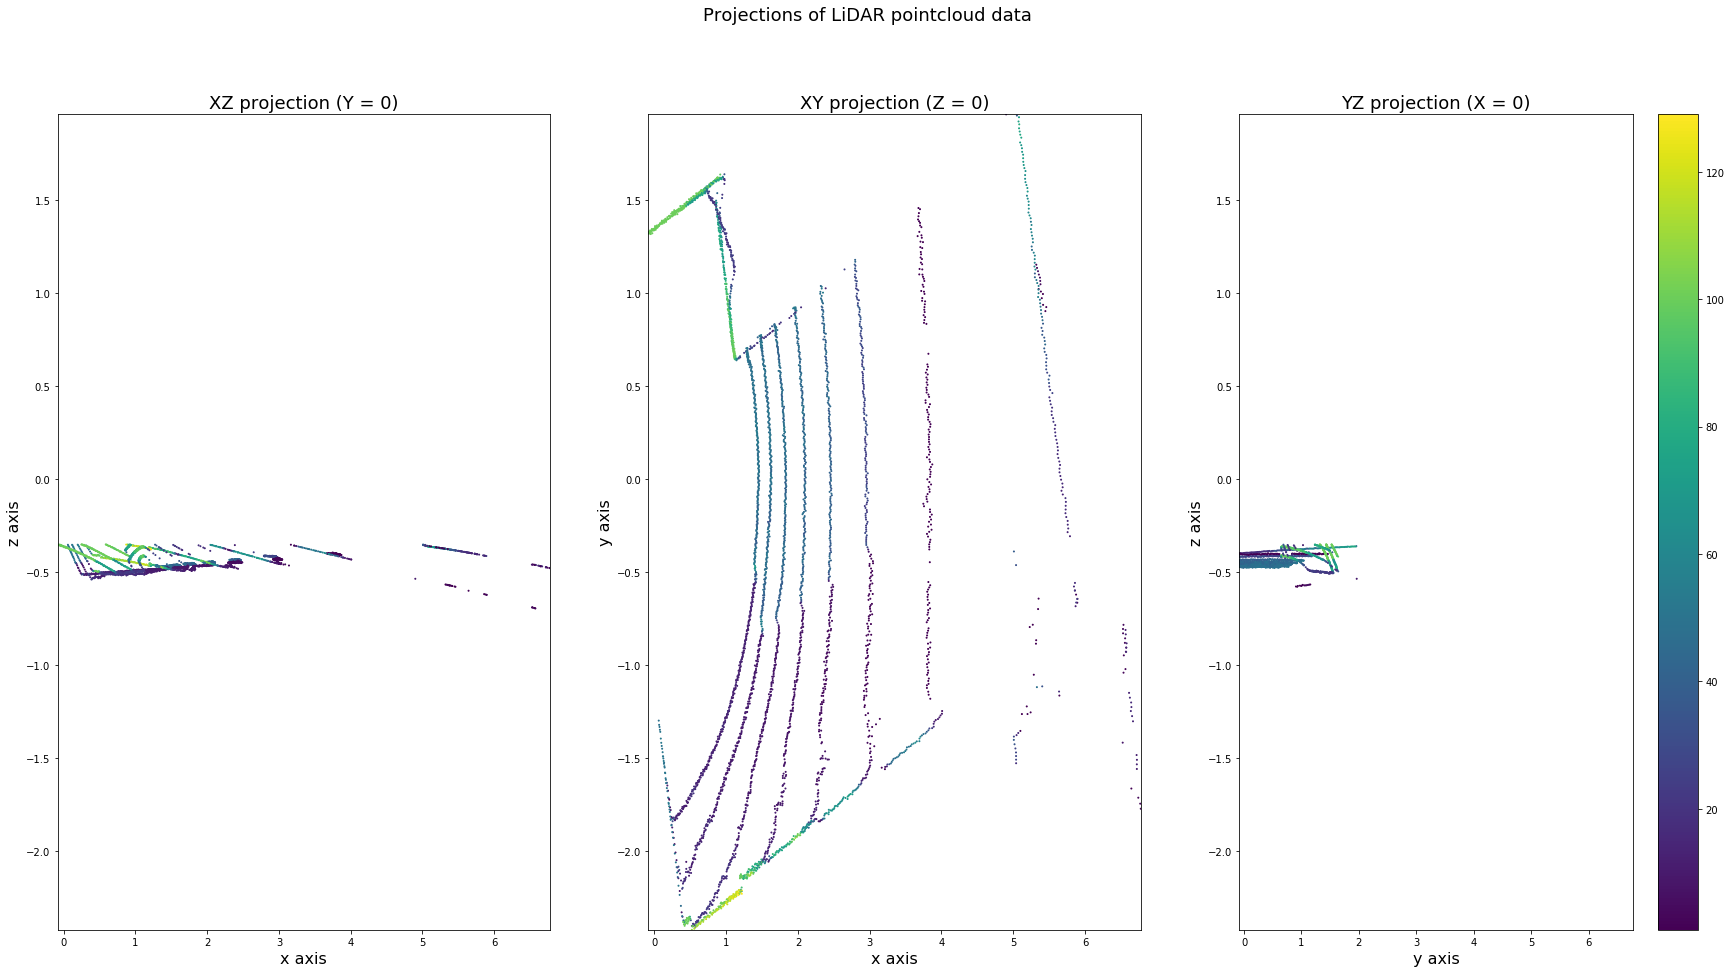

In [91]:
show_projections(ground_vals_after_rot, ['x', 'y', 'z', 'intensity'])

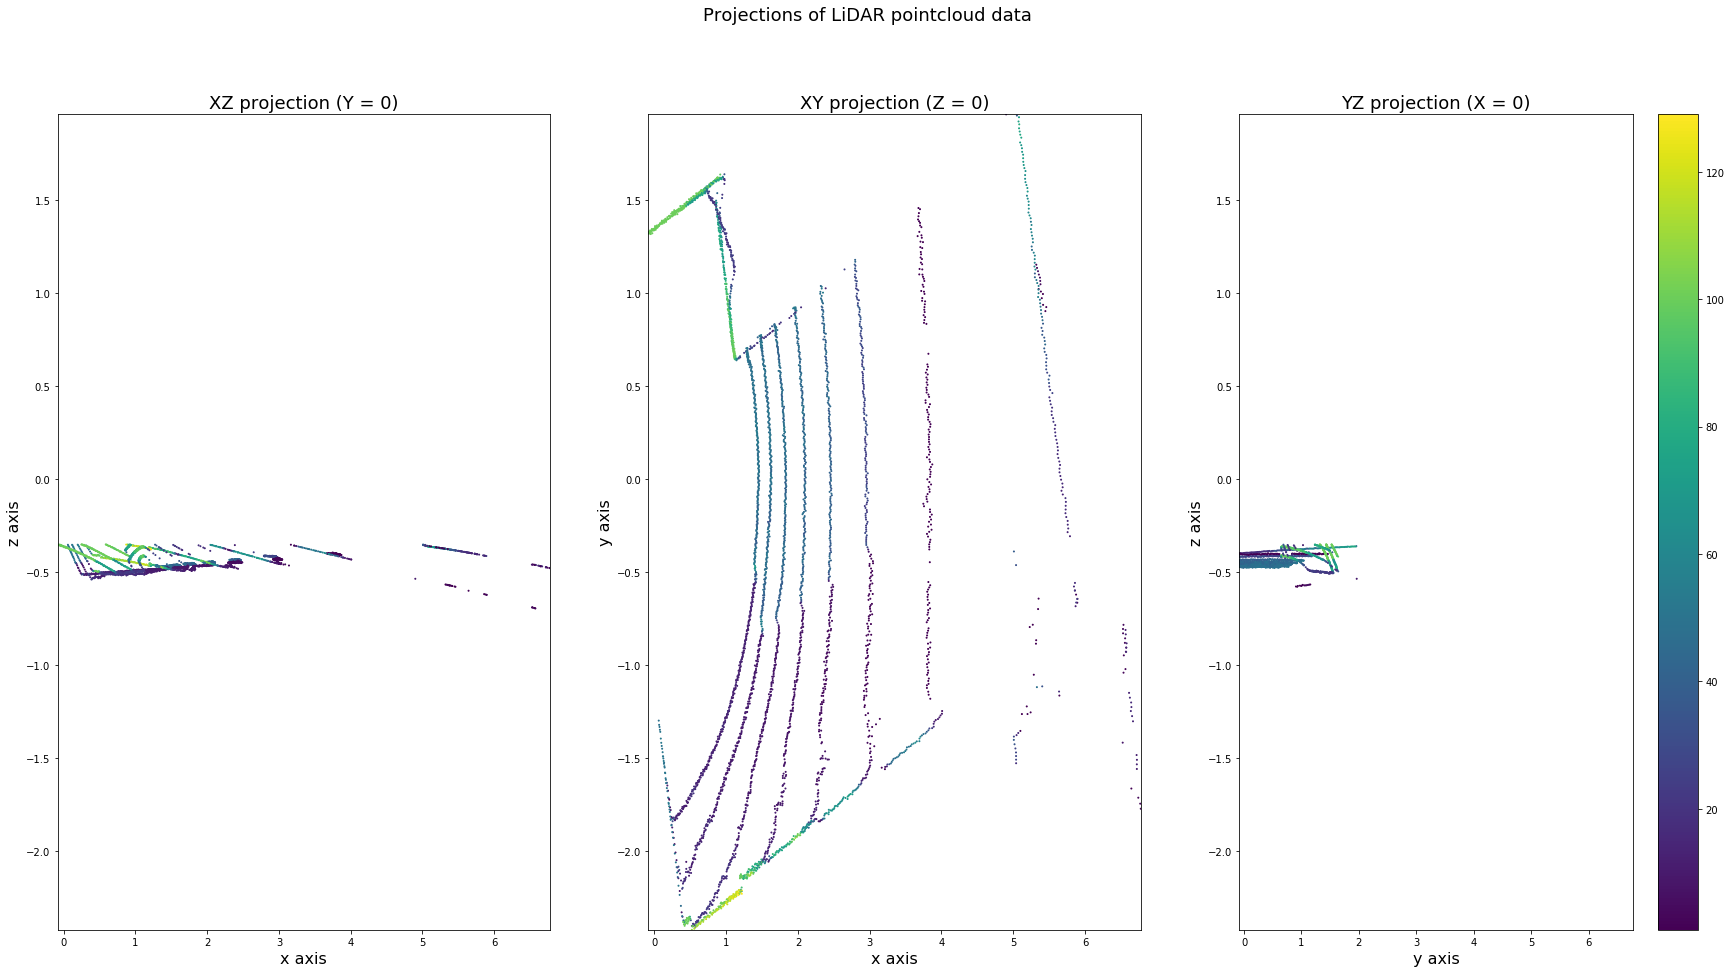

In [98]:
show_projections(ground_vals_after_rot, ['x', 'y', 'z', 'intensity'], savefig=True, filename='floorpoints_rotated_timestep0_z=-475mm')

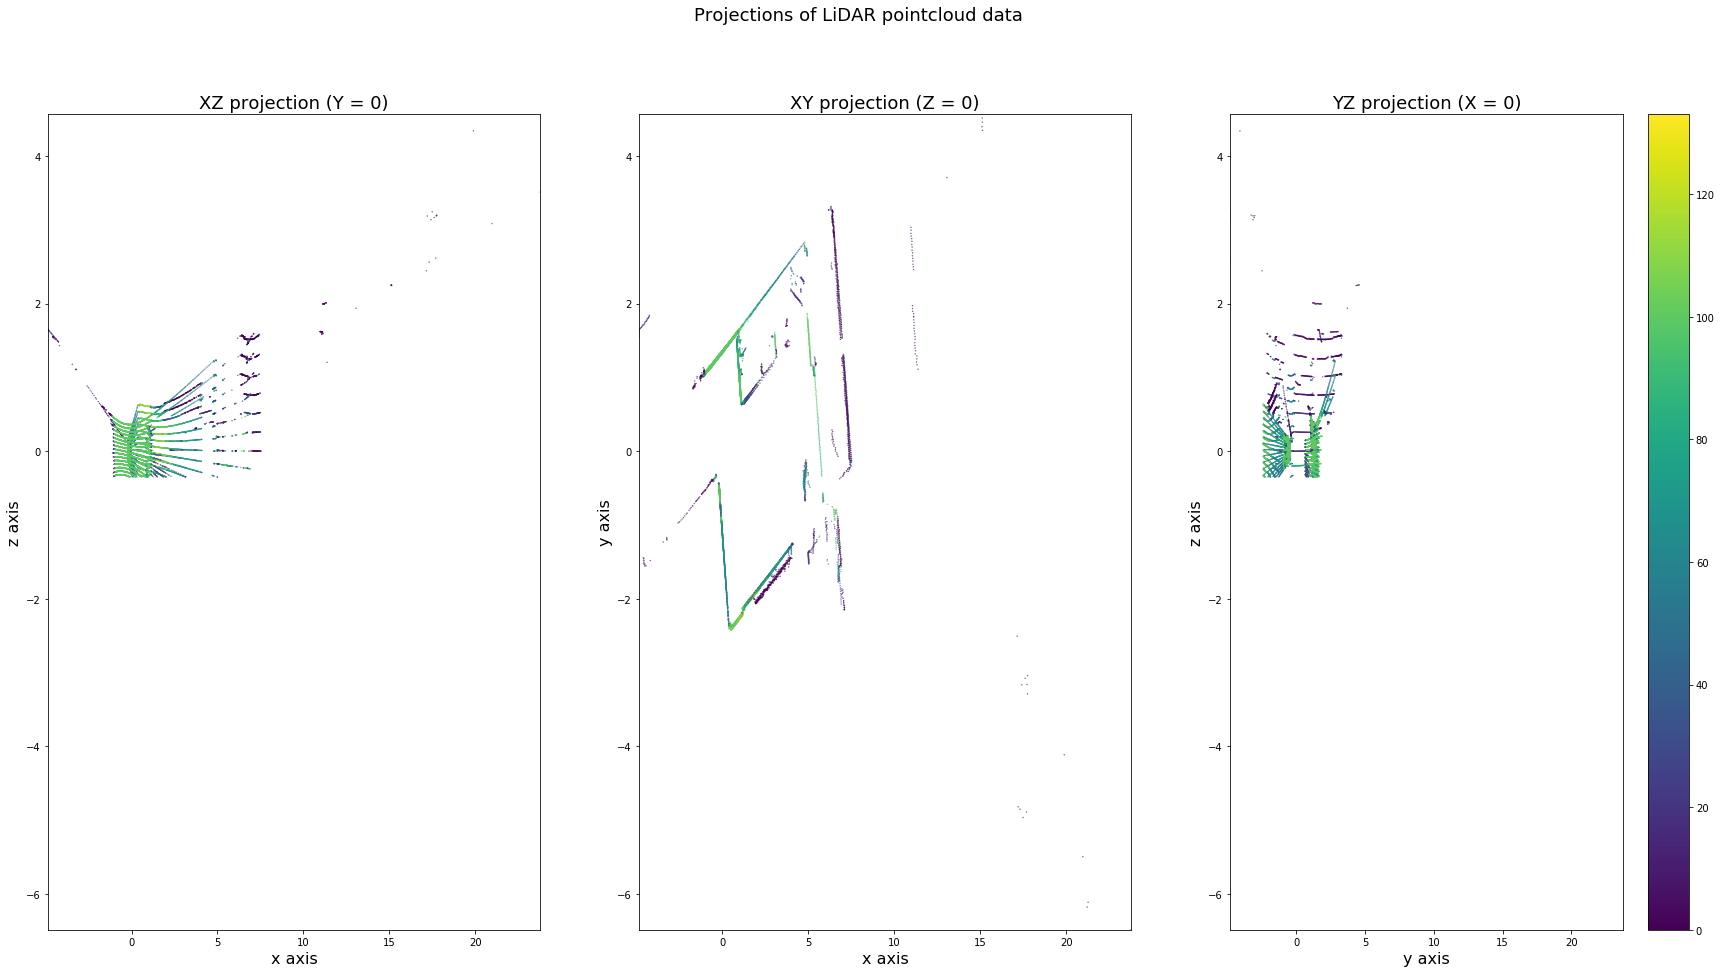

In [97]:
start_filtered = remove_ground_points(start_transformed, -0.35)
show_projections(start_filtered, ['x', 'y', 'z', 'intensity'], savefig=True, filename='data_wo_floor_rotated_timestep0_z=-350mm')

### 3D Plot using matplotlib

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


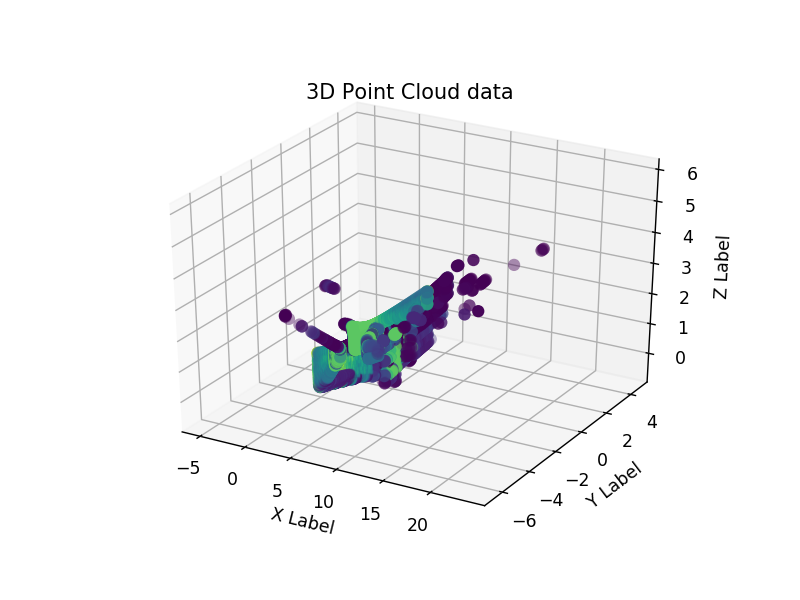

In [11]:
plot_pointcloud3d(start)

<IPython.core.display.Javascript object>


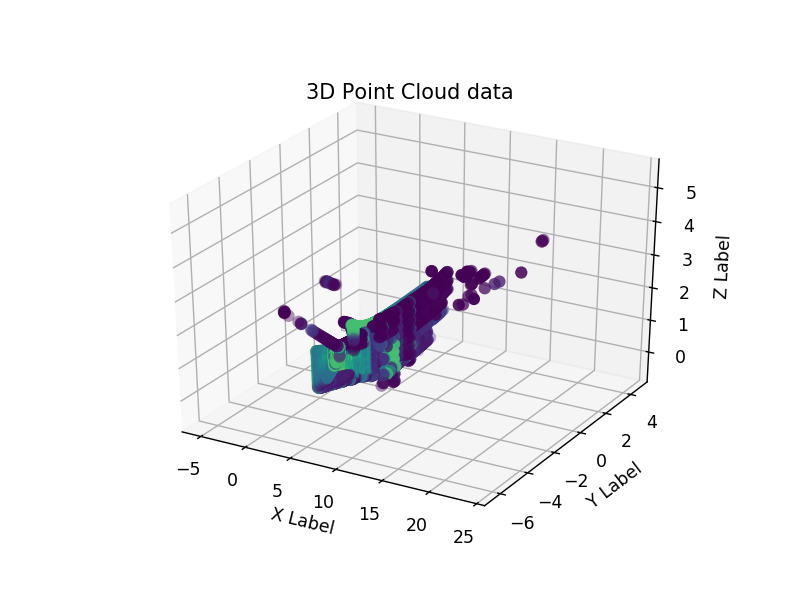

In [12]:
plot_pointcloud3d(end)

### 3D Plot using pptk

In [50]:
import pptk

In [14]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001)

In [46]:
v.capture('/home/brudermueller/Downloads/pcl_{}.png'.format(str(timesteps[0])))

In [31]:
len(timesteps)

431

In [36]:
# take only every 20th timestep
subsample = timesteps[::20]

In [56]:
len(subsample)

22

In [55]:
import time
for t in subsample: 
    pcl = data[data.rosbagTimestamp == t]
    v = pptk.viewer(pcl[['x', 'y', 'z']]) 
    v.attributes(pcl['intensity'])
    v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)    
    time.sleep(3)
    v.capture('/home/brudermueller/Downloads/pcl_{}.png'.format(str(t)))
    time.sleep(3)
    v.close()

In [88]:
v = pptk.viewer(start_ground[['x', 'y', 'z']]) 
v.attributes(start_ground['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)

In [53]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)